## READ THIS!
**NB:** PLEASE START WITH NOTEBOOK `project-2_JQ_take2.ipynb` !! This notebook is where I started with a lot of EDA and trying new things, but use as a reference/supplement to see additional work, rather than as my main notebook submission. Thank you!!

In [313]:
## IMPORT FEST!!
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn.metrics as metrics

%matplotlib inline

In [314]:
from notebook_starter import *
import notebook_starter

from plotter import *
import plotter

In [315]:
help(notebook_starter)

Help on module notebook_starter:

NAME
    notebook_starter - ### LOAD TO HAVE PRE-MADE FUNCTIONS FOR JUPYTER NOTEBOOKS THAT WILL NEED EDA, STATS, MODEL EVAL, ETC. ON DATAFRAMES.

FUNCTIONS
    confidencer(sample, sd=0.95)
        Requires scipy.stats. Take in sample and sig. level, then return CI
        sample = dataset
        sd = significance level, default 95%.
    
    eda(df)
        For initial EDA of dataframe
    
    metrics_dump(X, y)
        Requires sklearn regression + sklearn.metrics
        Returns 6 most common model eval scores.
        X = predictors
        y - target variable
    
    null_checker(df)
        Takes in dataframe and returns sorted list (descending) of columns with null values, and how many.
    
    r2_adj(X, y)
        Requires sklearn regression package + sklearn.metrics
        Returns adjusted R^2 for a model.
        X = predictors
        y = target variable
    
    sample_means(population, n=30, k=1000)
        Requires numpy. Takes in pop

In [316]:
train = pd.read_csv('./train.csv')

In [317]:
train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [318]:
# ## Messing around to check if I can write my plotter_groupby() fcn better.
# import math

# math.isnan(train['Pool QC'].unique()[0])

# np.nan_to_num(train['Pool QC'].unique())

# train['Pool QC'].unique()[0] == np.NaN()

# if np.nan in train['Pool QC'].unique():
#     print('yes')

# test = np.ndarray.tolist(train['Pool QC'].unique())
# for i in test:
#     try:
#         if math.isnan(float(i)):
#             test.remove(i)
            
#     except:
#         pass

# test

In [319]:
eda(train)

Dataframe shape (2051, 81)
Number of null values: 9822

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2051 entries, 0 to 2050
Data columns (total 81 columns):
Id                 2051 non-null int64
PID                2051 non-null int64
MS SubClass        2051 non-null int64
MS Zoning          2051 non-null object
Lot Frontage       1721 non-null float64
Lot Area           2051 non-null int64
Street             2051 non-null object
Alley              140 non-null object
Lot Shape          2051 non-null object
Land Contour       2051 non-null object
Utilities          2051 non-null object
Lot Config         2051 non-null object
Land Slope         2051 non-null object
Neighborhood       2051 non-null object
Condition 1        2051 non-null object
Condition 2        2051 non-null object
Bldg Type          2051 non-null object
House Style        2051 non-null object
Overall Qual       2051 non-null int64
Overall Cond       2051 non-null int64
Year Built         2051 non-null int64
Year

In [320]:
null_checker(train)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Lot Frontage       330
Garage Yr Blt      114
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
Bsmt Cond           55
Bsmt Qual           55
BsmtFin Type 1      55
Mas Vnr Type        22
Mas Vnr Area        22
Bsmt Half Bath       2
Bsmt Full Bath       2
Garage Cars          1
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Garage Area          1
Total Bsmt SF        1
dtype: int64

In [321]:
numeric_cols = []
for i in range(len(train.dtypes)):
    if train.dtypes[i] !=object:
        numeric_cols.append([train.columns[i], train.dtypes[i]])

In [322]:
numeric_cols

[['Id', dtype('int64')],
 ['PID', dtype('int64')],
 ['MS SubClass', dtype('int64')],
 ['Lot Frontage', dtype('float64')],
 ['Lot Area', dtype('int64')],
 ['Overall Qual', dtype('int64')],
 ['Overall Cond', dtype('int64')],
 ['Year Built', dtype('int64')],
 ['Year Remod/Add', dtype('int64')],
 ['Mas Vnr Area', dtype('float64')],
 ['BsmtFin SF 1', dtype('float64')],
 ['BsmtFin SF 2', dtype('float64')],
 ['Bsmt Unf SF', dtype('float64')],
 ['Total Bsmt SF', dtype('float64')],
 ['1st Flr SF', dtype('int64')],
 ['2nd Flr SF', dtype('int64')],
 ['Low Qual Fin SF', dtype('int64')],
 ['Gr Liv Area', dtype('int64')],
 ['Bsmt Full Bath', dtype('float64')],
 ['Bsmt Half Bath', dtype('float64')],
 ['Full Bath', dtype('int64')],
 ['Half Bath', dtype('int64')],
 ['Bedroom AbvGr', dtype('int64')],
 ['Kitchen AbvGr', dtype('int64')],
 ['TotRms AbvGrd', dtype('int64')],
 ['Fireplaces', dtype('int64')],
 ['Garage Yr Blt', dtype('float64')],
 ['Garage Cars', dtype('float64')],
 ['Garage Area', dtype('flo

In [323]:
nums = []
for i in numeric_cols:
    nums.append(i[0])


In [324]:
nums

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Lot Area',
 'Overall Qual',
 'Overall Cond',
 'Year Built',
 'Year Remod/Add',
 'Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 '1st Flr SF',
 '2nd Flr SF',
 'Low Qual Fin SF',
 'Gr Liv Area',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area',
 'Wood Deck SF',
 'Open Porch SF',
 'Enclosed Porch',
 '3Ssn Porch',
 'Screen Porch',
 'Pool Area',
 'Misc Val',
 'Mo Sold',
 'Yr Sold',
 'SalePrice']

In [325]:
## popping out 'numeric' columns that are meaningless for us, or are the target variable
unwanted = ['Id', 'PID', 'SalePrice']
nums = [e for e in nums if e not in unwanted]

In [326]:
## checking for null int columns to make the most basic model possible.
null_columns=train.columns[train.isnull().any()]
int_nulls = []

for i in nums:
    if i in null_columns:
        int_nulls.append(i)

train[int_nulls].isnull().sum().sort_values(ascending=False)

Lot Frontage      330
Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
dtype: int64

In [327]:
train[train['Lot Frontage'].isnull()]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
23,12,527165230,20,RL,NaN,7980,Pave,NaN,IR1,Lvl,...,0,0,NaN,GdPrv,Shed,500,3,2010,WD,185000
27,1534,909277040,50,RL,NaN,11700,Pave,Grvl,IR1,HLS,...,0,0,NaN,NaN,NaN,0,7,2008,WD,198000
31,2860,909276010,70,RL,NaN,11435,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,6,2006,WD,230000
42,983,923275040,85,RL,NaN,9101,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,7,2009,WD,165500
50,2511,533221080,160,FV,NaN,2998,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,WD,166000
59,997,527107010,60,RL,NaN,15038,Pave,NaN,IR2,Lvl,...,0,0,NaN,NaN,NaN,0,11,2008,WD,173000
62,230,905109170,20,RL,NaN,20062,Pave,NaN,IR1,Low,...,0,0,NaN,NaN,NaN,0,4,2010,WD,270000


In [328]:
# train.groupby('MS Zoning')['Lot Frontage'].describe().T.mean()

In [329]:
# train.groupby('Lot Shape')['Lot Frontage'].describe().T.mean()

### Plotting some ways to fill in null values for Lot Frontage

C:\Users\james\Anaconda3\envs\dsi\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


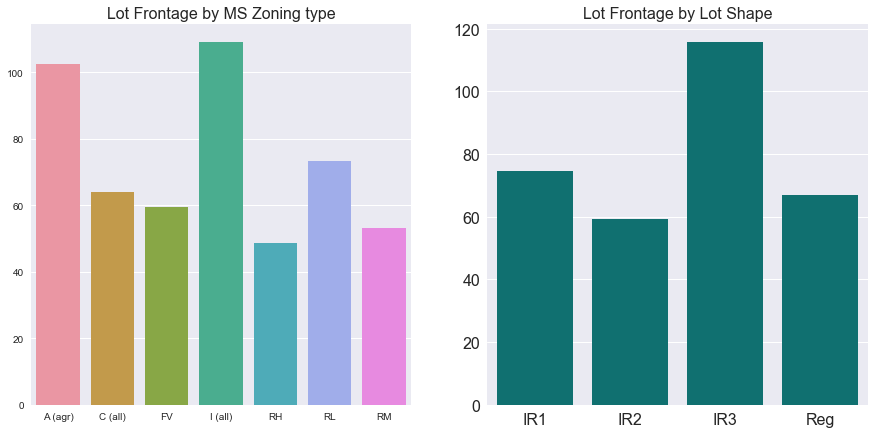

In [330]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 7));


sns.barplot(x=train['MS Zoning'].sort_values().unique(), y=[i for i in train.groupby('MS Zoning')['Lot Frontage'].mean()], ax=ax1);
ax1.set_title(label='Lot Frontage by MS Zoning type', fontsize=16);

sns.barplot(x=train['Lot Shape'].sort_values().unique(), y=[i for i in train.groupby('Lot Shape')['Lot Frontage'].agg('mean')], ax=ax2, color='teal');
ax2.set_title(label='Lot Frontage by Lot Shape', fontsize=16);
ax2.tick_params(labelsize=16);

**Notes:** Okay, so I'm going to fill null Lot Frontage values by mean for each ~~MS Zoning type.~~ Lot Shape. 

This is more intuitive since it's related to Lots.

**NEXT:** the other int cols. Gonna just `df.fillna(df.mean())` on those because they're unimportant / not worth it. `(inplace=True)`?

In [331]:
# plot_groupby(train, 'Lot Frontage', 'Lot Shape')
## needs work for nan vals

In [332]:
# train[train['Total Bsmt SF'].isnull()]

In [333]:
# x = train['Garage Type'].sort_values().unique()[:-1]
# y = [i for i in train.groupby('Garage Type')['Garage Yr Blt'].agg('mean')]

# sns.barplot(x=x, y=y);
# ax1.set_title(label='Garage Blt by Garage Type', fontsize=16);


C:\Users\james\Anaconda3\envs\dsi\lib\site-packages\seaborn\categorical.py:1428: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  stat_data = remove_na(group_data)


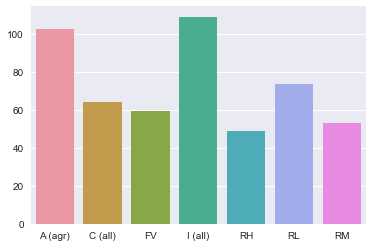

In [334]:
# plot_groupby(train, 'Lot Frontage', 'Lot Shape')
plot_groupby(train, 'Lot Frontage', 'MS Zoning')

In [335]:
def plot_groupby(df, column, grouping, summary='mean'):
    """Barplots the summary statistic of choice (default=mean) for a specific grouping, for a specific column.
    """
    
    test = np.ndarray.tolist(df[grouping].unique())
    for i in test:
        try:
            if math.isnan(float(i)):
                test.remove(i)
        except:
            pass

    sns.barplot(x=sorted(test), y=[i for i in df.groupby(grouping)[column].agg(summary)]);

In [336]:
# plot_groupby(train, 'Garage Yr Blt', 'Garage Type')

In [337]:
## aggregate lot frontage by lot shape.
train.groupby('Lot Shape').agg('mean')['Lot Frontage']
# train.groupby('Lot Shape').agg('mean')['Lot Frontage']['IR1']

Lot Shape
IR1     74.582090
IR2     59.416667
IR3    115.666667
Reg     66.968595
Name: Lot Frontage, dtype: float64

In [338]:
# #### need to set this call somehow -- find the lot shape for the row (null val), 
# ## then find the mean for the lot shape of that type
# train[train['Lot Shape'] == 'IR1']['Lot Frontage'].mean()

# train.columns.get_loc('Lot Shape')

# train[train['Lot Frontage'].isnull()].index

# train.groupby('Lot Shape').agg('mean')['Lot Frontage'].index



# type(train.iloc[train[train['Lot Frontage'].isnull()].index, train.columns.get_loc('Lot Shape')])

# null_row = train[train['Lot Frontage'].isnull()].index
# null_col = train.columns.get_loc('Lot Shape')

# # train[train['Lot Shape'] == train.iloc[null_row, null_col]].mean()['Lot Frontage']

In [339]:
lotfill = train.iloc[train[train['Lot Frontage'].isnull()].index, train.columns.get_loc('Lot Shape')].map(train.groupby('Lot Shape').agg('mean')['Lot Frontage'])

In [340]:
train['Lot Frontage'].fillna(lotfill, inplace=True)

In [341]:
train[int_nulls].isnull().sum().sort_values(ascending=False)

Garage Yr Blt     114
Mas Vnr Area       22
Bsmt Half Bath      2
Bsmt Full Bath      2
Garage Area         1
Garage Cars         1
Total Bsmt SF       1
Bsmt Unf SF         1
BsmtFin SF 2        1
BsmtFin SF 1        1
Lot Frontage        0
dtype: int64

In [342]:
int_nulls.remove('Lot Frontage')
int_nulls

['Mas Vnr Area',
 'BsmtFin SF 1',
 'BsmtFin SF 2',
 'Bsmt Unf SF',
 'Total Bsmt SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Garage Yr Blt',
 'Garage Cars',
 'Garage Area']

### Next Steps:
1. Slice these out of the main df (train)
2. Use `df.fillna(df.mean())` for the ones that are left
3. Re-assign those to the original df (train).
4. Slice out all the numeric_cols into a new features df
5. Model process!

In [343]:
df_fill = train[int_nulls]

In [344]:
df_fill.fillna(df_fill.mean(), inplace=True)

C:\Users\james\Anaconda3\envs\dsi\lib\site-packages\pandas\core\generic.py:4355: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [345]:
# train.hist('Lot Area', bins=50);

In [346]:
# fig, ax = plt.subplots(ncols=1, nrows=len(df_fill.columns), figsize=(5, 30));

# for i in range(len(df_fill.columns)):
# #     ax[i].hist(df_fill[df_fill.columns[i]]);
# #     print(i)
    
#     df_fill.hist(df_fill.columns[i], ax=ax[i]);

In [347]:
train[int_nulls] = df_fill

In [348]:
train[nums].isnull().sum().sum()

0

In [349]:
X = train[nums]
y = train['SalePrice']
df_corr = pd.concat((X, y), axis=1)

In [350]:
abs(df_corr.corr()['SalePrice']).sort_values(ascending=False)[1:]

Overall Qual       0.800207
Gr Liv Area        0.697038
Garage Area        0.650246
Garage Cars        0.648197
Total Bsmt SF      0.628668
1st Flr SF         0.618486
Year Built         0.571849
Year Remod/Add     0.550370
Full Bath          0.537969
Garage Yr Blt      0.516738
Mas Vnr Area       0.508602
TotRms AbvGrd      0.504014
Fireplaces         0.471093
BsmtFin SF 1       0.423346
Open Porch SF      0.333476
Wood Deck SF       0.326490
Lot Frontage       0.323722
Lot Area           0.296566
Bsmt Full Bath     0.283429
Half Bath          0.283001
2nd Flr SF         0.248452
Bsmt Unf SF        0.190132
Bedroom AbvGr      0.137067
Enclosed Porch     0.135656
Screen Porch       0.134581
Kitchen AbvGr      0.125444
Overall Cond       0.097019
MS SubClass        0.087335
3Ssn Porch         0.048732
Bsmt Half Bath     0.045290
Low Qual Fin SF    0.041594
Mo Sold            0.032735
Pool Area          0.023106
BsmtFin SF 2       0.016249
Yr Sold            0.015203
Misc Val           0

In [351]:
# fig = plt.figure(figsize=(15, 7));
# labels = df_corr.corr()['SalePrice'].index

# plt.bar(x=labels, height=df_corr.corr()['SalePrice']);

# # ax = fig.gca();
# ax.set_xticklabels(labels=labels, rotation='vertical');

In [352]:
# sns.heatmap(abs(df_corr.corr()));

In [353]:
# sns.pairplot(df_corr.corr());

### FEATURE DECISION MAKING
- Pass 1: I've decided to throw out low correlation items just for ease.

In [354]:
df_test = pd.DataFrame(abs(df_corr.corr()['SalePrice']).sort_values(ascending=False)[1:])

featurecols = [i for i in df_test[df_test['SalePrice'] > 0.5].index]

In [355]:
featurecols

['Overall Qual',
 'Gr Liv Area',
 'Garage Area',
 'Garage Cars',
 'Total Bsmt SF',
 '1st Flr SF',
 'Year Built',
 'Year Remod/Add',
 'Full Bath',
 'Garage Yr Blt',
 'Mas Vnr Area',
 'TotRms AbvGrd']

In [356]:
X = X[featurecols]

In [357]:
print(X.shape, y.shape)

(2051, 12) (2051,)


**Next Steps: MODELING!!**
1. Regular cross-validation
2. Try again with scaling, poly, ElasticNet, other (or combo!)
3. Check all the scores!!!

In [358]:
from sklearn.cross_validation import KFold, cross_val_score
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV, ElasticNetCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

### Version 1.1:  basic model, no scaling

In [359]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [360]:
lr = LinearRegression()
cross_val_score(lr, X_train, y_train).mean(), cross_val_score(lr, X_test, y_test).mean()

(0.7958227708655032, 0.684045156409085)

In [361]:
lr.fit(X, y)
y_hat = lr.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_hat))

35631.60213347324

**NEED TO TRY IT ON TEST DATASET, BUT TEST EDA/CLEAN NEEDS TO HAPPEN**

In [362]:
test = pd.read_csv('./test.csv')

In [363]:
def feature_maker(df):
    nums = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
            'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd']
    
    new_df = df[nums]
    
    new_df = new_df.fillna(X.mean())    

In [364]:
feature_maker(test)

In [365]:
test = pd.read_csv('./test.csv')

In [366]:
nums = ['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars', 'Total Bsmt SF', '1st Flr SF', 'Year Built',
            'Year Remod/Add', 'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd']
    
new_df = test[nums]
    
new_df = new_df.fillna(new_df.mean())    

In [367]:
submission2 = pd.DataFrame(data = lr.predict(new_df), columns = ['SalePrice'], index=test['Id'])

In [368]:
submission2.to_csv('./project2submit_jq02_05.13.18.csv')

### Version 1.2: basic model, scaled X features

In [369]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_test_scaled = ss.transform(X_test)

In [370]:
lr = LinearRegression()

cross_val_score(lr, X_train_scaled, y_train, cv=10).mean(), cross_val_score(lr, X_test_scaled, y_test, cv=10).mean()

(0.7908672657948148, 0.7173761651943502)

In [371]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [372]:
y_hat = lr.predict(X)
np.sqrt(metrics.mean_squared_error(y, y_hat))

83661745.21472949

**Notes:** That's actually worse? DON'T USE THIS.

In [373]:
# A picture is worth a thousand words

def plot_cv(alphas, cv_means, optimal_alpha, lr_mse, log=False):
    # alphas = list of alphas
    # cv_means = list of CV mean MSE
    # optimal_alpha
    # lr_mse
    fig = plt.figure(figsize=(12,8))
    ax = plt.gca()

    if log:
        ax.semilogx(alphas, cv_means, lw=2)
    else:
        ax.plot(alphas, cv_means, lw=2)
    ax.axvline(optimal_alpha)
    ax.axhline(lr_mse)
    ax.set_xlabel('alpha')
    ax.set_ylabel('Mean Squared Error')
    
# plot_cv(ridge_model.alphas, ridge_cv_means, ridge_optimal_alpha, lr_cv_mean_mse, log=True)

### Version 2.1: ElasticNetCV on dis

In [374]:
X2 = train[df_test.index]
X2.drop(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold'], axis=1, inplace=True)
X_train, X_test, y_train, y_test = train_test_split(X2, y)

C:\Users\james\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [375]:
l1_ratios = np.linspace(0.05, 1, 19)

elastic_model = ElasticNetCV(l1_ratio=l1_ratios, cv=5, n_alphas=100)
elastic_model = elastic_model.fit(X_train, y_train)

elastic_optimal_alpha = elastic_model.alpha_
elastic_cv_means = [np.mean(cv_alpha) for cv_alpha in elastic_model.mse_path_]


print('Optimal alpha:',elastic_optimal_alpha)
print('Optimal l1 ratio:',elastic_model.l1_ratio_)
print('Min. RMSE:', np.sqrt(np.mean(elastic_cv_means)))
print('Train score:',elastic_model.score(X_train, y_train))
print('Test score:',elastic_model.score(X_test, y_test))

Optimal alpha: 173714.04569958
Optimal l1 ratio: 1.0
Min. RMSE: 68790.91727740633
Train score: 0.715846389013068
Test score: 0.6741154917995114


In [376]:
X2 = train[df_test.index]
X2.drop(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold'], axis=1, inplace=True)

C:\Users\james\Anaconda3\envs\dsi\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [377]:
X_train, X_test, y_train, y_test = train_test_split(X2, y)

In [378]:
lr_cv_mean_mse = -cross_val_score(lr, 
                                 X_train_scaled,
                                 y_train,
                                 cv=10,
                                 scoring='neg_mean_squared_error').mean()

** Actually a Ridge Model.**

In [379]:
# A:
r_alphas = np.logspace(0, 20, 200)

## build a Ridge model with cross-validation to search for best alpha within range given
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train, y_train)

ridge_optimal_alpha = ridge_model.alpha_

ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_model.cv_values_.T]

ridge_optimal_alpha, np.mean(ridge_cv_means)

(25.52908068239518, 4173978793.8992968)

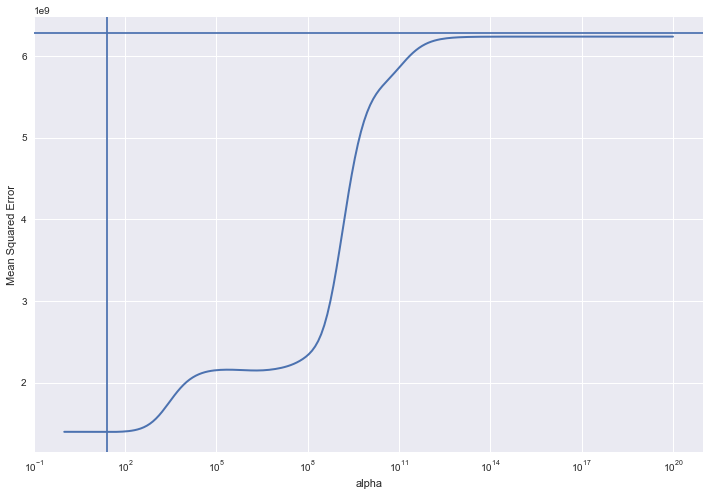

In [380]:
plot_cv(ridge_model.alphas, ridge_cv_means, ridge_optimal_alpha, lr_cv_mean_mse, log=True)

In [381]:
y_hat = ridge_model.predict(X2)
mse = metrics.mean_squared_error(y, y_hat)

In [382]:
ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test)

(0.8276401034505833, 0.8222916561851497)

In [383]:
## highest pos. and neg. betas for best model
print('Highest beta:',X2.columns[np.argmax(ridge_model.coef_)])
print('Lowest beta:',X2.columns[np.argmin(ridge_model.coef_)])

Highest beta: Overall Qual
Lowest beta: Kitchen AbvGr


In [384]:
print(np.sqrt(mse))
# print(mse < np.mean(ridge_cv_means))
# print(mse < 21157209)

33023.40951237459


In [385]:
from sklearn.preprocessing import PolynomialFeatures

In [386]:
pf = PolynomialFeatures(include_bias=False)
X_train_pfr = pf.fit_transform(X_train)
X_test_pfr = pf.transform(X_test)

In [387]:
# A:
r_alphas = np.logspace(0, 20, 200)

## build a Ridge model with cross-validation to search for best alpha within range given
ridge_pf = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_pf = ridge_pf.fit(X_train, y_train)

ridge_optimal_alpha = ridge_pf.alpha_

ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_pf.cv_values_.T]

ridge_optimal_alpha, np.mean(ridge_cv_means)

(25.52908068239518, 4173978793.8992968)

In [388]:
ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test)

(0.8276401034505833, 0.8222916561851497)

**Note:** Not much better, so we'll leave it here. and use the original Ridge model

** Fitting this Ridge model to test data **

In [389]:
df_test.index

Index(['Overall Qual', 'Gr Liv Area', 'Garage Area', 'Garage Cars',
       'Total Bsmt SF', '1st Flr SF', 'Year Built', 'Year Remod/Add',
       'Full Bath', 'Garage Yr Blt', 'Mas Vnr Area', 'TotRms AbvGrd',
       'Fireplaces', 'BsmtFin SF 1', 'Open Porch SF', 'Wood Deck SF',
       'Lot Frontage', 'Lot Area', 'Bsmt Full Bath', 'Half Bath', '2nd Flr SF',
       'Bsmt Unf SF', 'Bedroom AbvGr', 'Enclosed Porch', 'Screen Porch',
       'Kitchen AbvGr', 'Overall Cond', 'MS SubClass', '3Ssn Porch',
       'Bsmt Half Bath', 'Low Qual Fin SF', 'Mo Sold', 'Pool Area',
       'BsmtFin SF 2', 'Yr Sold', 'Misc Val'],
      dtype='object')

In [390]:
test = pd.read_csv('./test.csv')
X = test.copy()

lotfill = X.iloc[X[X['Lot Frontage'].isnull()].index, X.columns.get_loc('Lot Shape')].map(X.groupby('Lot Shape').agg('mean')['Lot Frontage'])
X['Lot Frontage'].fillna(lotfill, inplace=True)

X = test[df_test.index]

X = X.fillna(X.mean())

X.drop(['Year Built', 'Year Remod/Add', 'Garage Yr Blt', 'Yr Sold'], axis=1, inplace=True)

In [391]:
X.shape

(879, 32)

In [392]:
y_hat = ridge_model.predict(X)
submit_df = pd.DataFrame(data = y_hat, index=test['Id'], columns=['SalePrice'])

In [393]:
submit_df.to_csv('./project2submit_jq03_05.14.18.csv')

### COMPLETELY NEW APPROACH... from scratch

In [394]:
Xnew = train[['Lot Area']]
y = train['SalePrice']

In [395]:
X_train, X_test, y_train, y_test = train_test_split(Xnew, y)

In [396]:
X_train_scaled = np.log(X_train)
X_test_scaled = np.log(X_test)

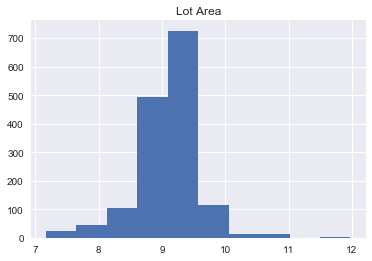

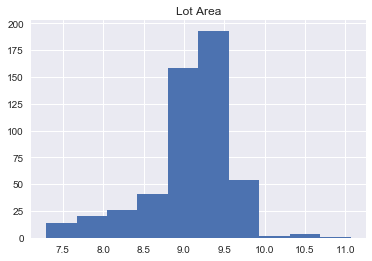

In [397]:
X_train_scaled.hist();
X_test_scaled.hist();

In [398]:
lr = LinearRegression()

print(cross_val_score(lr, X_train_scaled, y_train).mean())
print(cross_val_score(lr, X_test_scaled, y_test).mean())

0.14037957444224983
0.09444397576961934


In [399]:
lr.fit(X_train_scaled, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [400]:
metrics.mean_squared_error(y, lr.predict(Xnew))

5.309972605098047e+17

In [401]:
test = pd.read_csv('./test.csv')

In [402]:
lr.predict(test[['Lot Area']]).shape

(879,)

### Start over... approach #2

In [403]:
null_checker(train)

Pool QC           2042
Misc Feature      1986
Alley             1911
Fence             1651
Fireplace Qu      1000
Garage Cond        114
Garage Qual        114
Garage Finish      114
Garage Type        113
Bsmt Exposure       58
BsmtFin Type 2      56
BsmtFin Type 1      55
Bsmt Cond           55
Bsmt Qual           55
Mas Vnr Type        22
dtype: int64

In [404]:
## Starting our list of columns to drop. First let's drop all the BS with mostly null vals.
drops = ['Id', 'PID','Pool QC', 'Misc Feature', 'Alley', 'Fence', 'Fireplace Qu']

## Next we're gonna drop anything with a bunch of null vals that are not numeric, to make it easier to fill out NaN vals
blah = train[[i for i in null_checker(train).index]].dtypes
for ind,dtype in enumerate(blah):
    if dtype == object:
        drops.append(blah.index[ind])

In [405]:
drops

['Id',
 'PID',
 'Pool QC',
 'Misc Feature',
 'Alley',
 'Fence',
 'Fireplace Qu',
 'Pool QC',
 'Misc Feature',
 'Alley',
 'Fence',
 'Fireplace Qu',
 'Garage Cond',
 'Garage Qual',
 'Garage Finish',
 'Garage Type',
 'Bsmt Exposure',
 'BsmtFin Type 2',
 'BsmtFin Type 1',
 'Bsmt Cond',
 'Bsmt Qual',
 'Mas Vnr Type']

In [406]:
# creating our new DF
attempt = train.drop(drops, axis=1)

In [407]:
attempt.columns

Index(['MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area', 'Street',
       'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope',
       'Neighborhood', 'Condition 1', 'Condition 2', 'Bldg Type',
       'House Style', 'Overall Qual', 'Overall Cond', 'Year Built',
       'Year Remod/Add', 'Roof Style', 'Roof Matl', 'Exterior 1st',
       'Exterior 2nd', 'Mas Vnr Area', 'Exter Qual', 'Exter Cond',
       'Foundation', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF',
       'Total Bsmt SF', 'Heating', 'Heating QC', 'Central Air', 'Electrical',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd',
       'Functional', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars',
       'Garage Area', 'Paved Drive', 'Wood Deck SF', 'Open Porch SF',
       'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val',
      

In [408]:
lotfill = attempt.iloc[attempt[attempt['Lot Frontage'].isnull()].index, attempt.columns.get_loc('Lot Shape')].map(attempt.groupby('Lot Shape').agg('mean')['Lot Frontage'])
attempt['Lot Frontage'].fillna(lotfill, inplace=True)

attempt = attempt.fillna(attempt.mean())

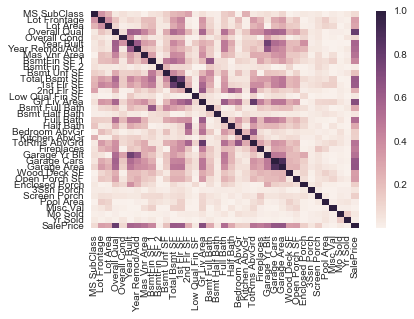

In [409]:
sns.heatmap(abs(attempt.corr()));

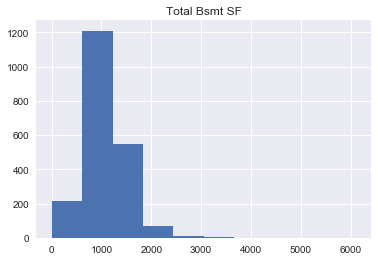

In [410]:
attempt.hist(column=['Total Bsmt SF']);

** Using intuition **

In [411]:
## 'Lot Area
features = ['Neighborhood', 'House Style', 'Lot Config']
dummies = attempt[features]

In [412]:
dummies = pd.get_dummies(dummies, columns=features, drop_first=True)

In [413]:
X = pd.concat([attempt['Lot Area'], dummies], axis=1)
y = attempt['SalePrice']

In [414]:
not_in_test = ['Neighborhood_GrnHill', 'Neighborhood_Landmrk']
X = X.drop(not_in_test, axis=1)

In [415]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [416]:
## adding this in.
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [417]:
## generates 200 points between 10^0 and 10^5. we're setting our alpha range.Which $\alpha$ to chose?  Let's search!
r_alphas = np.logspace(0, 5, 200) 

## build a Ridge model with cross-validation to search for best alpha within range given
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X_train, y_train)

ridge_optimal_alpha = ridge_model.alpha_

ridge_cv_means = [np.mean(cv_alpha) for cv_alpha in ridge_model.cv_values_.T]

ridge_cv_mean_mse = -cross_val_score(ridge_model, 
                                 X_train,
                                 y_train,
                                 cv=5,
                                 scoring='neg_mean_squared_error').mean()

ridge_cv_mean_rmse = np.sqrt(ridge_cv_mean_mse)

In [418]:
print('Optimal alpha:',ridge_optimal_alpha)
# print('Ridge r2:',np.mean(ridge_cv_means))
print('Ridge MSE:', ridge_cv_mean_mse)
print('Ridge RSME:', ridge_cv_mean_rmse)

Optimal alpha: 1.7834308769319096
Ridge MSE: 2261074934.9688563
Ridge RSME: 47550.76166549655


In [419]:
ridge_model.score(X_train, y_train), ridge_model.score(X_test, y_test)

(0.6616092587298942, 0.5031680687427396)

In [420]:
y_hat = ridge_model.predict(X)

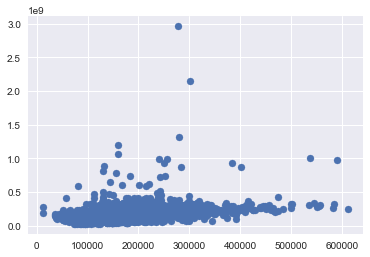

In [421]:
plt.scatter(y, y_hat);

### MOST RECENT MODEL

In [422]:
test = pd.read_csv('./test.csv')

In [423]:
test2 = test[['Neighborhood', 'House Style', 'Lot Config', 'Lot Area']]

In [424]:
test2.dtypes

Neighborhood    object
House Style     object
Lot Config      object
Lot Area         int64
dtype: object

In [425]:
test_features = ['Neighborhood', 'House Style', 'Lot Config']
test_dummies = test[test_features]

test_dummies = pd.get_dummies(test_dummies, columns=test_features, drop_first=True)

test_X = pd.concat([test['Lot Area'], test_dummies], axis=1)

In [426]:
test_X.columns

Index(['Lot Area', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'House Style_1.5Unf',
       'House Style_1Story', 'House Style_2.5Fin', 'House Style_2.5Unf',
       'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside'],
      dtype='object')

In [427]:
X.columns

Index(['Lot Area', 'Neighborhood_Blueste', 'Neighborhood_BrDale',
       'Neighborhood_BrkSide', 'Neighborhood_ClearCr', 'Neighborhood_CollgCr',
       'Neighborhood_Crawfor', 'Neighborhood_Edwards', 'Neighborhood_Gilbert',
       'Neighborhood_Greens', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NAmes', 'Neighborhood_NPkVill',
       'Neighborhood_NWAmes', 'Neighborhood_NoRidge', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_SWISU', 'Neighborhood_Sawyer',
       'Neighborhood_SawyerW', 'Neighborhood_Somerst', 'Neighborhood_StoneBr',
       'Neighborhood_Timber', 'Neighborhood_Veenker', 'House Style_1.5Unf',
       'House Style_1Story', 'House Style_2.5Fin', 'House Style_2.5Unf',
       'House Style_2Story', 'House Style_SFoyer', 'House Style_SLvl',
       'Lot Config_CulDSac', 'Lot Config_FR2', 'Lot Config_FR3',
       'Lot Config_Inside'],
      dtype='object')

In [428]:
not_in_test = ['Neighborhood_GrnHill', 'Neighborhood_Landmrk']

In [429]:
r_alphas = np.logspace(0, 5, 200) 

## build a Ridge model with cross-validation to search for best alpha within range given
ridge_model = RidgeCV(alphas = r_alphas, store_cv_values=True)
ridge_model = ridge_model.fit(X, y)

In [430]:
preds = ridge_model.predict(test_X)

In [431]:
preds.shape

(879,)

In [432]:
test['Id'].shape

(879,)

In [433]:
submission = pd.concat([test['Id'], pd.Series(preds)], axis=1)

In [434]:
submission.rename(columns={0:'SalePrice'}, inplace=True)

In [435]:
submission.head()

,Id,SalePrice
0,2658,133240.307547
1,2718,132467.919160
2,2414,207173.139734
3,1989,115900.667745
4,625,142805.708931


In [436]:
submission.to_csv('./project2submit_jq01_05.11.18.csv')

**Hmmm** looks like there's a weird tier just under $300K

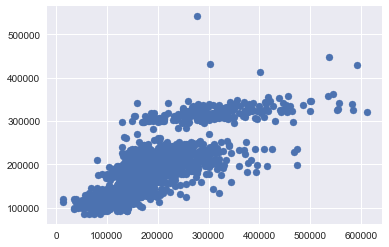

In [437]:
plt.scatter(y, ridge_model.predict(X));

### Intuition + PolynomialFeatures + Lasso

In [438]:
test3 = test[['Neighborhood', 'House Style', 'Lot Config', 'Lot Area']]

In [439]:
from sklearn.preprocessing import PolynomialFeatures

In [440]:
features = ['Neighborhood', 'House Style', 'Lot Config']
dummies = train[features]

dummies = pd.get_dummies(dummies, columns=features, drop_first=True)

X = pd.concat([attempt['Lot Area'], dummies], axis=1)
y = train['SalePrice']

not_in_test = ['Neighborhood_GrnHill', 'Neighborhood_Landmrk']
X = X.drop(not_in_test, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y)

**Adding Polynomial features to test interactions.**

In [441]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [442]:
pf = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)

pf = pf.fit(X_train)
X_train_pf = pf.transform(X_train)
X_test_pf = pf.transform(X_test)

X_train.shape, X_train_pf.shape

((1538, 37), (1538, 740))

**Holy moly there's a lot. Let's try to drop some with LassoCV.**

In [443]:
# l_alphas = np.arange(0.001, 0.15, 0.0025)

lasso_model = LassoCV(cv=5)
lasso_model = lasso_model.fit(X_train_pf, y_train)

In [444]:
lasso_optimal_alpha = lasso_model.alpha_
lasso_optimal_alpha

824.4210109508217

In [445]:
lasso_cv_means = [np.mean(cv_alpha) for cv_alpha in lasso_model.mse_path_]

In [446]:
lasso_cv_rsme = np.sqrt(np.mean(lasso_cv_means))
lasso_cv_rsme

55147.481752968466

In [447]:
lasso_model.score(X_train_pf, y_train), lasso_model.score(X_test_pf, y_test)

(0.7504985354311825, 0.5812248908027414)

Turns out the model was pretty overfit to the train data. Let's look at the actual vs. predicted scatter

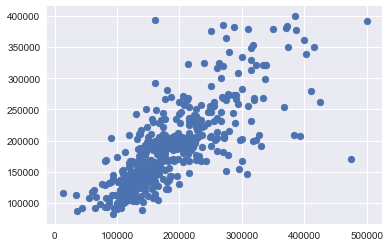

In [448]:
plt.scatter(y_test, lasso_model.predict(X_test_pf));